In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [36]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [37]:
height_upper_limit = df['Height'].quantile(0.99)
height_lower_limit = df['Height'].quantile(0.01)
height_lower_limit, height_upper_limit

(58.13441158671655, 74.7857900583366)

### trimming

In [38]:
df_trim = df[(df['Height'] <= height_upper_limit) & (df['Height'] >= height_lower_limit)]
df_trim

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [39]:
df_trim.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9804\1283720260.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9804\1283720260.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'Height After trimming')

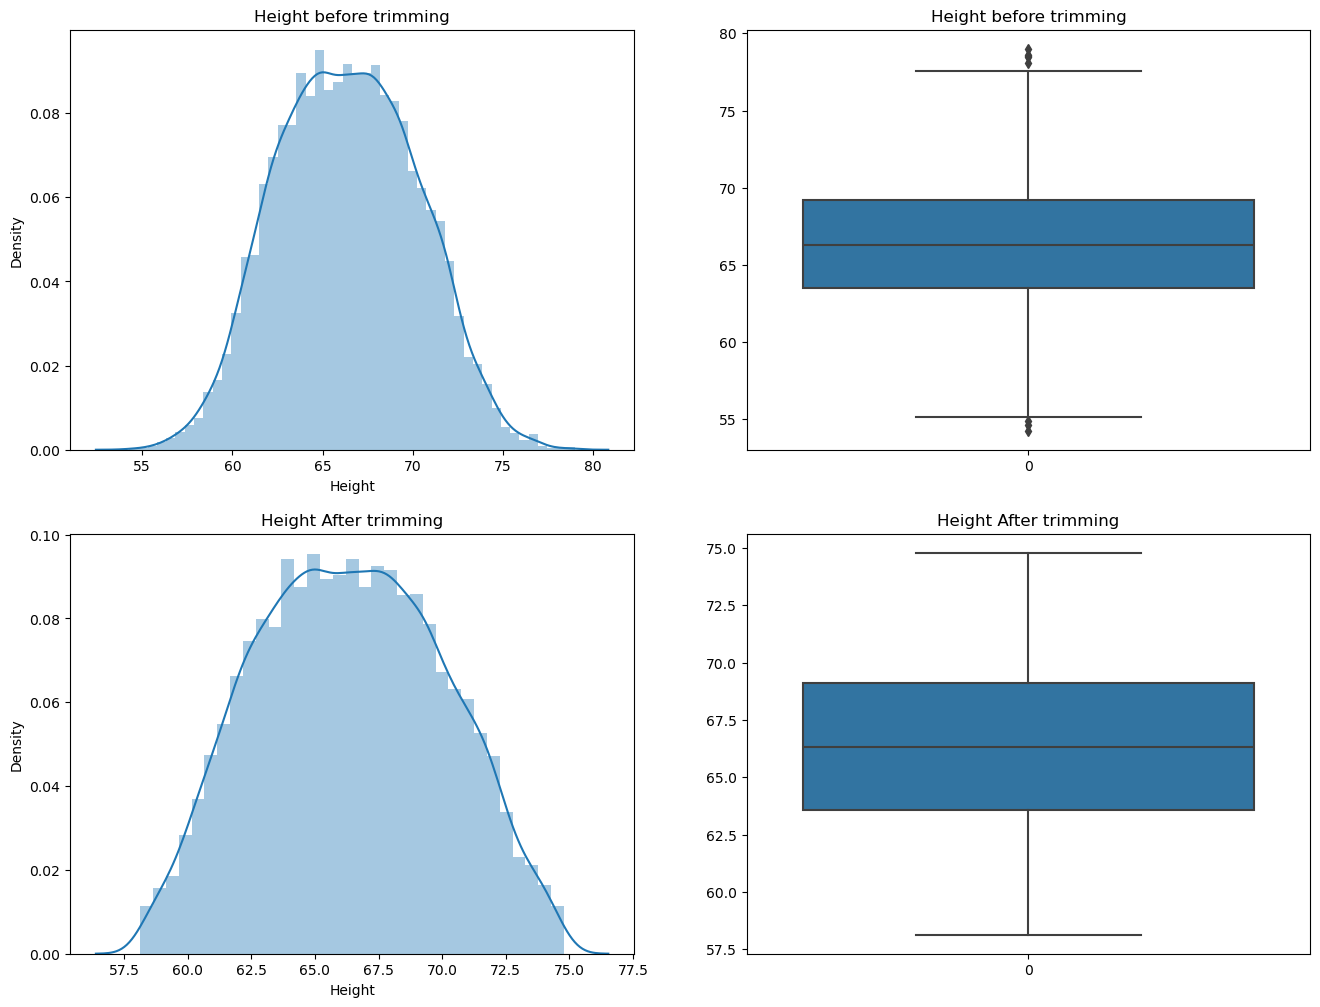

In [40]:
plt.figure(figsize=(16,12))

plt.subplot(221)
sns.distplot(df['Height'])
plt.title('Height before trimming')

plt.subplot(222)
sns.boxplot(df['Height'])
plt.title('Height before trimming')

plt.subplot(223)
sns.distplot(df_trim['Height'])
plt.title('Height After trimming')

plt.subplot(224)
sns.boxplot(df_trim['Height'])
plt.title('Height After trimming')

### capping

In [43]:
df_cap = df.copy()


df_cap['Height'] = np.where(
    df['Height'] >= height_upper_limit,
    height_upper_limit,
    np.where(
        df['Height'] <= height_lower_limit,
        height_lower_limit,
        df['Height']
    )
)
df_cap.shape

(10000, 3)

In [44]:
df.shape

(10000, 3)

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9804\2602728258.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9804\2602728258.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'Height After capping')

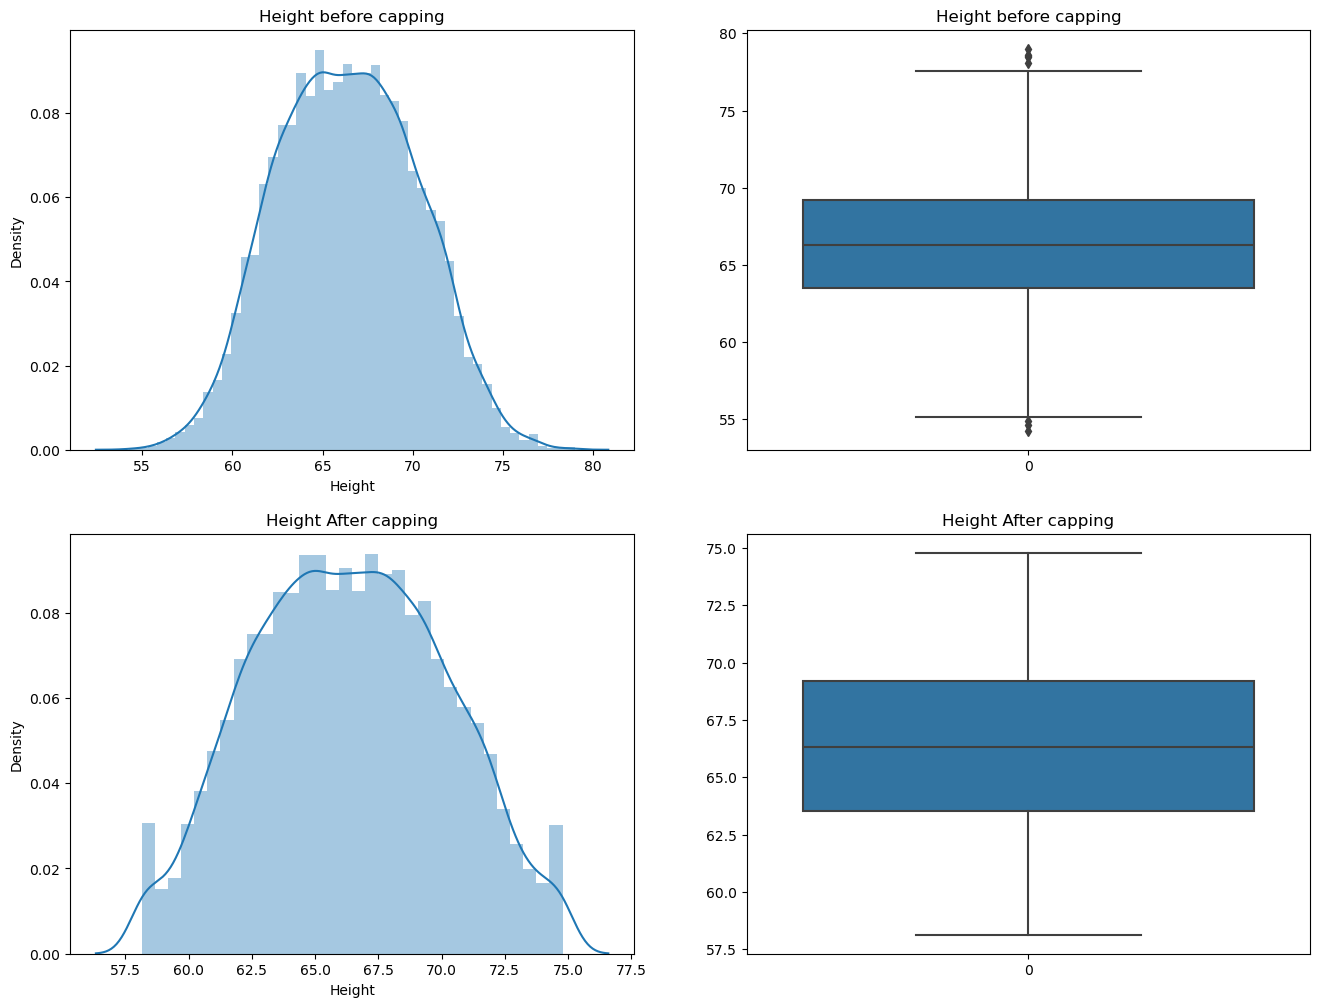

In [45]:
plt.figure(figsize=(16,12))

plt.subplot(221)
sns.distplot(df['Height'])
plt.title('Height before capping')

plt.subplot(222)
sns.boxplot(df['Height'])
plt.title('Height before capping')

plt.subplot(223)
sns.distplot(df_cap['Height'])
plt.title('Height After capping')

plt.subplot(224)
sns.boxplot(df_cap['Height'])
plt.title('Height After capping')